# Deep Learning Demo

In this notebook, I will be using a <b>Convolutional Neural Network </b> to classify images of geometric shapes.

## Generating the Data

#### Imported Libraries

In [3]:
import numpy as np
from PIL import Image, ImageDraw
import random
import matplotlib.pyplot as plt

In [4]:
# function to generate the images

def generate_dataset(num_samples):
    images = []
    labels = []
    
    # defining colors for shapes and their backgrounds
    shape_colors = ['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta']
    background_colors = ['white', 'lightgray', 'lightyellow', 'lightblue', 'black']
    
    for _ in range (num_samples):
        # choose background color
        bg = random.choice(background_colors)
        img = Image.new('RGB', (64,64), bg)
        draw = ImageDraw.Draw(img)
        
        # choose shape color
        shape_color = random.choice(shape_colors)
        
        # choose whether circle or square is drawn
        label = np.random.choice([0, 1])
        
        # vary the position and size of the shapes
        start_x = np.random.randint(5, 20)
        start_y = np.random.randint(5, 20)
        size = np.random.randint(10, 40)
        
        # draw a circle
        if label == 0:
            draw.ellipse([start_x, start_y, start_x + size, start_y + size], fill = shape_color)
            
        # draw a square
        else:
            draw.rectangle([start_x, start_y, start_x + size, start_y + size], fill = shape_color)
                       
            
        images.append(np.array(img))
        labels.append(label)
        
    return np.array(images), np.array(labels)

In [29]:
X, y = generate_dataset(num_samples = 100000)

#### Visualizing Samples of Generated Images

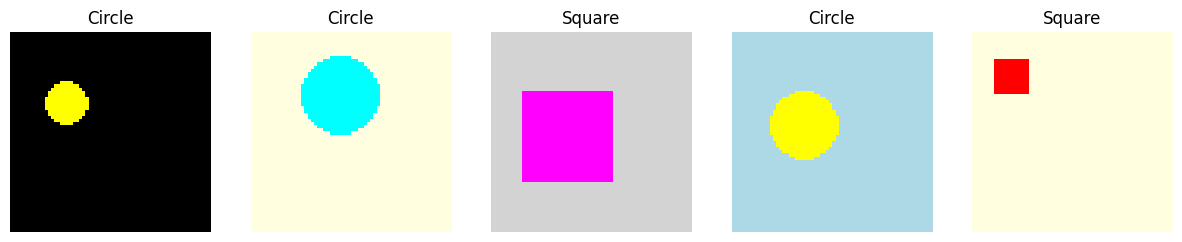

In [24]:
fig, axes = plt.subplots(1, 5, figsize = (15, 15))
label_map = {0: "Circle", 1: "Square"}

for i in range(5):
    ax = axes[i]
    idx = np.random.randint(0, len(X))
    ax.imshow(X[idx])
    ax.set_title(f"{label_map[y[idx]]}")
    ax.axis('off')
    
plt.show()

## Pre-processing the Data

Before we feed the data into a neural network, we need to pre-process it. This involves normalizing the image data (scale pixel values from [0, 255] to [0, 1]) and converting the labels into a suitable format for classification.

#### Imported Libraries

In [26]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [30]:
# normalize images
X = X / 255.0

# one-hot encode labels
y = to_categorical(y, num_classes=2)

# split data into training & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Defining & Training the CNN Model

#### Imported Libraries

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [32]:
model = Sequential()

# first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second conv layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# third
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten the results to feed into a fully connected layer
model.add(Flatten())

# fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))

# use dropout to prevent overfitting
model.add(Dropout(0.5))

# output layer (2 classes for circle or square)
model.add(Dense(2, activation='softmax'))

model.summary()

/Users/iverleigh/anaconda3/envs/cnn_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-12 12:30:39.750749: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-09-12 12:30:39.752089: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-12 12:30:39.752100: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-12 12:30:39.752512: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 12:30:39.753042: I tensorflow/core/common_runtime/pluggable_device/pluggable

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
# train and use 20% of training data for validation
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_split=0.2)

Epoch 1/10


2024-09-12 12:31:53.852870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - accuracy: 0.9202 - loss: 0.1440 - val_accuracy: 1.0000 - val_loss: 1.3662e-05
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 1.0000 - loss: 4.7159e-05 - val_accuracy: 1.0000 - val_loss: 4.3059e-06
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 1.0000 - loss: 1.0509e-05 - val_accuracy: 1.0000 - val_loss: 5.0839e-07
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 1.0000 - loss: 3.3603e-06 - val_accuracy: 1.0000 - val_loss: 1.7811e-07
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.9999 - loss: 5.7683e-04 - val_accuracy: 0.5888 - val_loss: 0.6443
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9398 - loss: 0.1266 - val_accuracy: 1.0000 - val_loss: 6.7765e-04
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 1.0000 - loss: 6.9176e-04 - val_accuracy: 1.0000 - val_loss: 7.9584e-05
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2

## Evaluating the Model

In [35]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9999 - loss: 3.6801e-04
Test accuracy: 0.999750018119812


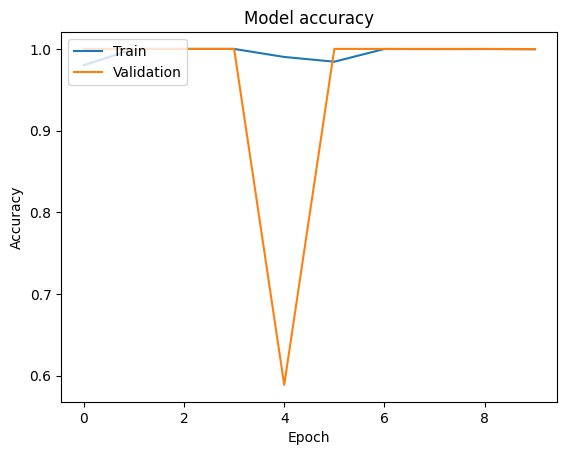

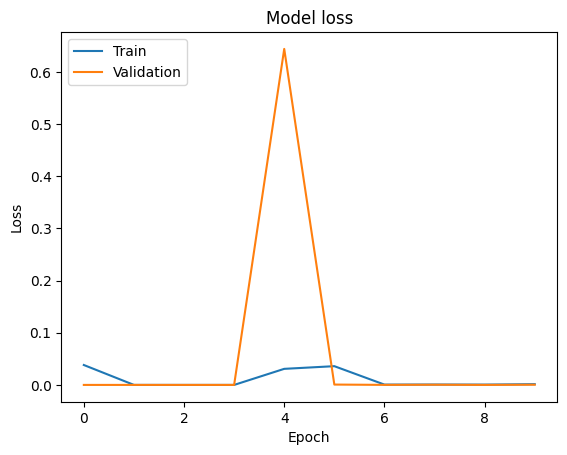

In [36]:
# training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Conclusions

- The first epoch shows that the model achieves high accuracy on training and validation data, but there is a noticeable gap in loss.
- Since validation accuracy hits 100% very early, this is a sign that there is overfitting.
- After the 2nd epoch, the accuracy reaches 100% for both training and validation sets and the loss becomes very small.
- At epoch 5, there is a dramatic drop in validation accuracy and a spike in validation loss. Two possibilities include the model might be overfitting or the learning rate is too high.
- After the 6th epoch, model seems to recover from the instability. The validation accuracy returns to 100% and the validation loss becomes small again (but not as small as before).
- The final test accuracy is nearly perfect (99.975%) but this is likely because the dataset is too easy or the model has become too specialized for the training data.

## Potential Considerations

- Add a regularization technique to make the model more robust.
- Monitor validation loss/accuracy and stop training when improvement stagnates.
- Check learning rate and adjust this to prevent the instability observed.
- Use a simpler model by reducing the number of layers. 